### Laden der notwendigen Pakete in Python
Python verwendet ein modulares System von **Paketen** und **Modulen**, um die Funktionalität der Sprache zu erweitern. Ein **Modul** ist eine einzelne Datei mit Python-Code, während ein **Paket** eine Sammlung von Modulen ist, 
die in einem Verzeichnis organisiert sind.

**Funktion von Paketen**
- Ermöglichen die Wiederverwendung von Code.
- Organisieren Funktionen und Klassen in thematische Einheiten.
- Erlauben das einfache Installieren und Verwalten von Bibliotheken Dritter.
- Ermöglichen die Weitergabe von Codeteilen von allen an alle.


In [5]:
import pandas as pd ## für Datenanalyse
import numpy as np  ## für numerische Berechnungen
import matplotlib.pyplot as plt ## für Datenvisualisierung
from scipy.stats import cumfreq ## Modul für kumulative Verteilungen

### Daten einlesen und formatieren

In [6]:
df = pd.read_csv("Datendemo-Fahrt.csv", encoding="latin1", delimiter=";")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("#", "Num")
df["Größe"] = df["Größe"].str.replace(",", ".").astype(float)
df = df.drop(columns=["Unnamed:_5", "Unnamed:_6"], errors="ignore")
display(df.head())

,Person,Größe,Num_Geschwister,Schulweg_min,Schulweg_km
0,NaN,1.58,1,7,4
1,NaN,1.67,0,20,12
2,NaN,1.86,1,20,8
3,NaN,1.75,2,14,6
4,NaN,1.74,2,2,1


### Auch Python kann Histogramme...

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


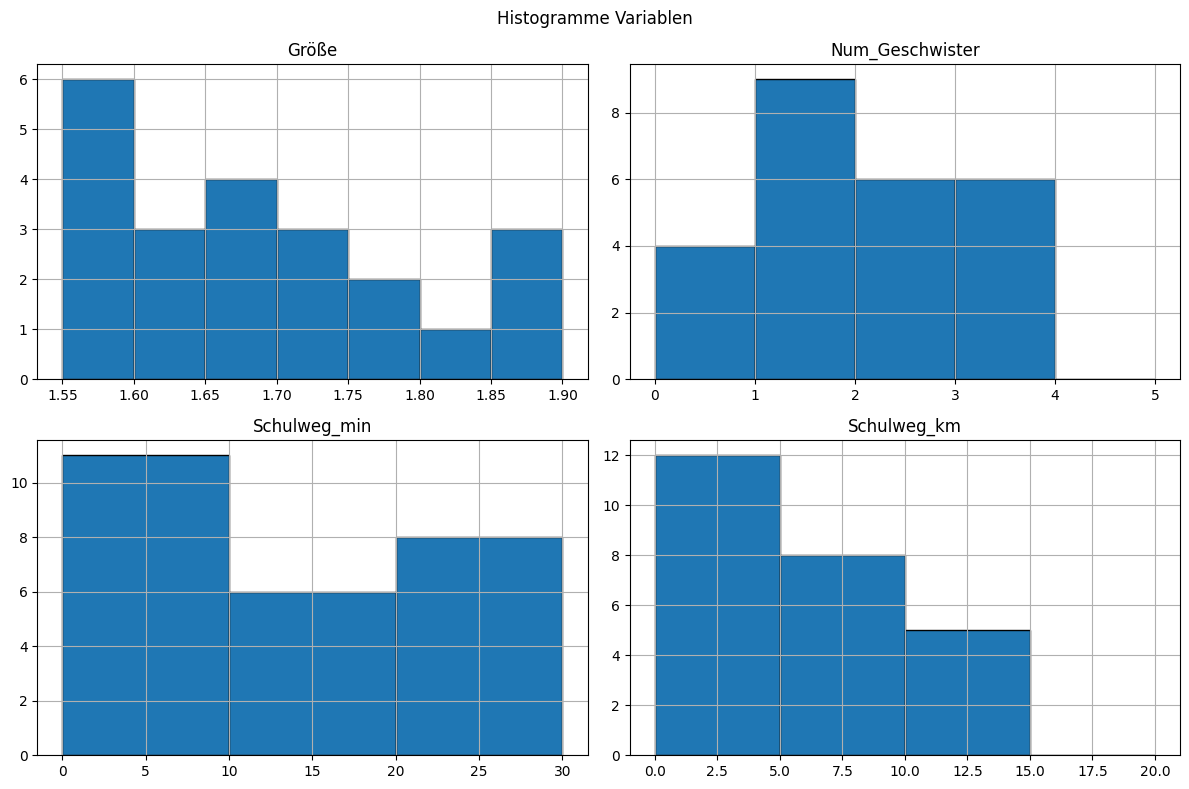

Summe aller Variablen:
Person               0.00
Größe               41.77
Num_Geschwister     39.00
Schulweg_min       294.00
Schulweg_km        135.00
dtype: float64


In [23]:
# Plot histograms of numerical variables with custom bins
def plot_histograms(dataframe, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Größe
    bins = [1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, np.inf]
    dataframe["Größe"].hist(ax=axes[0, 0], bins=bins, edgecolor='black')
    axes[0, 0].set_title("Größe")
    
    # Num_Geschwister
    bins = [0, 1, 2, 3, 4, 5, np.inf] #np.unique(dataframe["Num_Geschwister"].dropna().astype(int))
    dataframe["Num_Geschwister"].hist(ax=axes[0, 1], bins=bins, edgecolor='black')
    axes[0, 1].set_title("Num_Geschwister")
    
    # Schulweg_min
    bins = list(range(0, 40, 10)) + [np.inf]
    dataframe["Schulweg_min"].hist(ax=axes[1, 0], bins=bins, edgecolor='black')
    axes[1, 0].set_title("Schulweg_min")
    
    # Schulweg_km
    bins = list(range(0, 25, 5)) + [np.inf]
    dataframe["Schulweg_km"].hist(ax=axes[1, 1], bins=bins, edgecolor='black')
    axes[1, 1].set_title("Schulweg_km")
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_histograms(df, "Histogramme Variablen")

# Print sum of all variables
print("Summe aller Variablen:")
print(df.sum(numeric_only=True))


### Lorenzkurve und Gini-Koeffizient

Die **Lorenzkurve** $L(x)$ stellt die Verteilung einer Variablen (z. B. Schulweg, Körpergröße) grafisch dar. Sie zeigt, welcher Anteil der Bevölkerung welchen Anteil zur Gesamtmenge/Gesamtsumme der Variablen beiträgt. Dafür wird die Bevölkerung aufsteigend nach dem Anteil sortiert.
Bei vollständiger Gleichverteilung bildet die Lorenzkurve eine Ursprungsgerade mit Steigung $\frac{M}{N}$.

In aller Regel normiert man die Gesamtmenge und Bevölkerungszahl jeweils auf $1$.

Der **Gini-Koeffizient** $G$ ist ein Maß für die Ungleichheit einer Verteilung:
- **0** bedeutet **vollständige Gleichverteilung** (jeder hat denselben Anteil an der Gesamtmenge).
- **1** bedeutet **maximale Ungleichheit** (die Gesamtmenge liegt bei einer einzigen Person).

In [8]:
def lorenz_curve(values, fill_areas=True,show_gini=False):
    column_name = values.name 
    values = np.sort(values)  # Sort values
    cum_values = np.cumsum(values)  # Cumulative sum
    total = cum_values[-1]
    lorenz = np.insert(cum_values / total, 0, 0)  # Normalize
    x = np.linspace(0, 1, len(lorenz))
    
    fig, ax = plt.subplots()
    ax.plot(x, lorenz, drawstyle='steps-post', label="Lorenzkurve")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Gleichverteilung")

    if fill_areas:
        ax.fill_between(x, 0, lorenz, color='blue', alpha=0.3, label="")
        ax.fill_between(x, lorenz, x, color='red', alpha=0.2, label="")
    
    ax.set_title(column_name)
    ax.set_xlabel("Bevölkerungsanteil geordnet")
    ax.set_ylabel("Kumulierte Variable")
    ax.legend()
    plt.show()
    
    # Gini-Koeffizient berechnen
    if show_gini == True:
        gini = 1 - 2 * np.trapz(lorenz, x)
        print(f" Der Gini-Koeffizient für {column_name} ist {gini:.4f}.")    

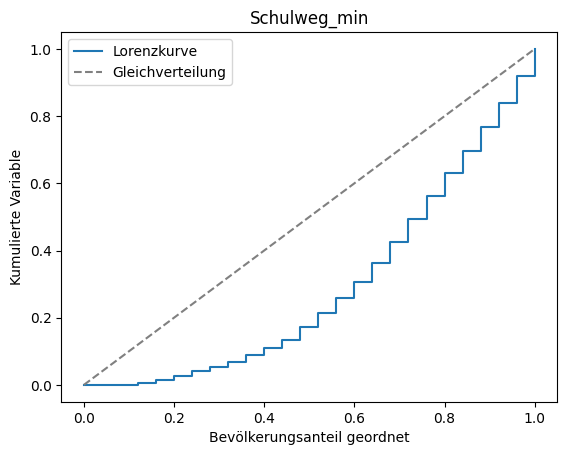

In [11]:
lorenz_curve(df["Schulweg_min"].dropna(), fill_areas=False, show_gini=False)
#print(f"Gini-Koeffizient für Größe: {gini:.4f}")

### Berechnung des Gini-Koeffizienten

Der Gini-Koeffizient wird berechnet als relativer Abstand zwischen tatsächlicher Verteilung und Gleichverteilung. Mathematisch ergibt sich das als Anteil der Fläche unter der Gleichverteilungslinie, der über der Lorenzkurve liegt:

$ G = \frac{0.5 - \int_0^1 L(x) dx }{0.5}$

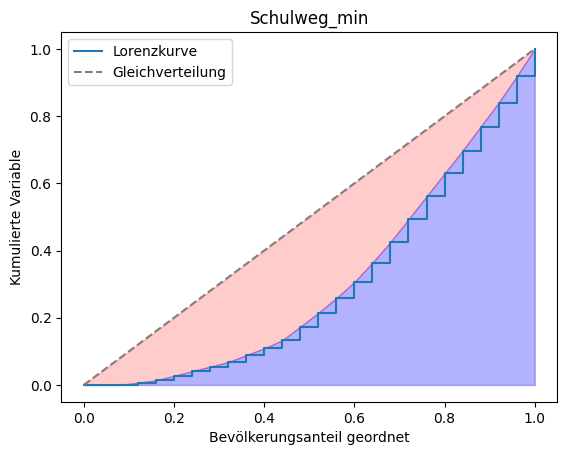

 Der Gini-Koeffizient für Schulweg_min ist 0.3848.


In [13]:
lorenz_curve(df["Schulweg_min"].dropna(), fill_areas=True, show_gini=True)

### Einkommens- und Vermögensverteilung

In [32]:
simulatedeconomic = pd.read_csv("simulatedincomeandwealth.csv", encoding="latin1", delimiter=",")
simulatedeconomic["Wealth"] = simulatedeconomic["Wealthinthousand"] * 1000
display(simulatedeconomic.head())

,Income,Wealthinthousand,Wealth
0,3714,42,42000
1,720,11,11000
2,781,84,84000
3,1556,0,0
4,255,16,16000


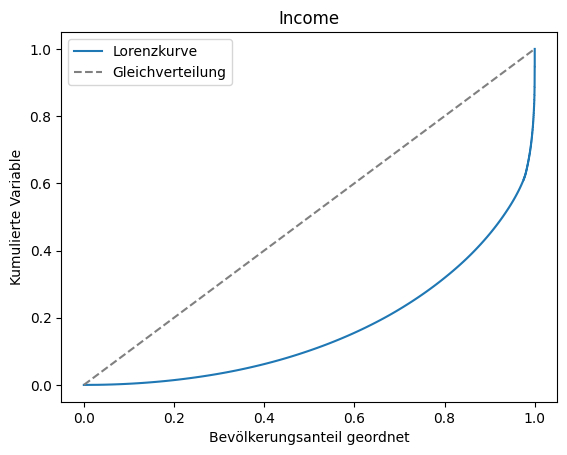

 Der Gini-Koeffizient für Income ist 0.6619.


In [38]:
lorenz_curve(simulatedeconomic["Income"].dropna(), fill_areas=False, show_gini=True)

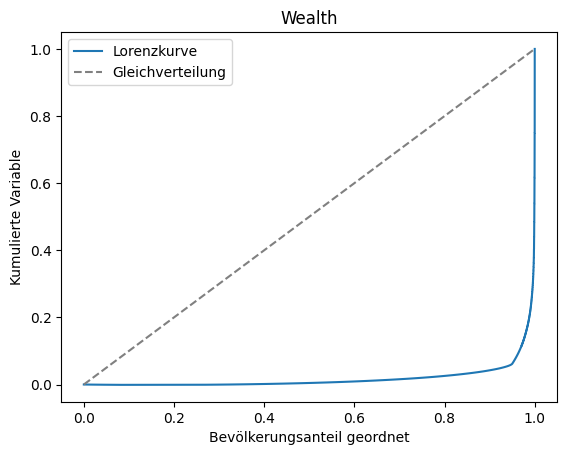

 Der Gini-Koeffizient für Wealth ist 0.9641.


In [39]:
lorenz_curve(simulatedeconomic["Wealth"].dropna(), fill_areas=False, show_gini=True)

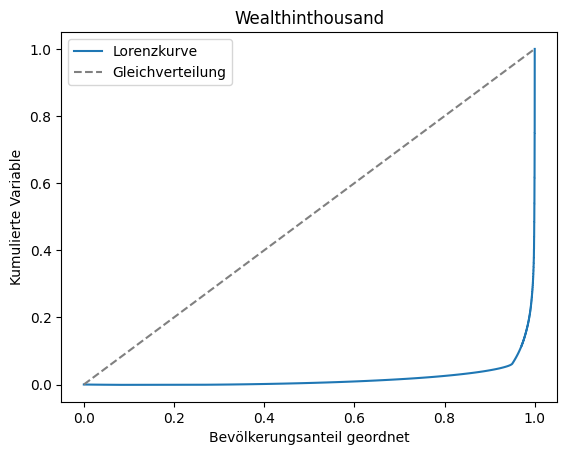

 Der Gini-Koeffizient für Wealthinthousand ist 0.9641.


In [40]:
lorenz_curve(simulatedeconomic["Wealthinthousand"].dropna(), fill_areas=False, show_gini=True)